In [184]:
import cv2
import os
import csv
import sys
import numpy as np
import glob

In [209]:
dir_folder = '/home/hongyu2/project/hackathon2/UR/processed_dataset_win20_thre18_3'
W, H = 224, 224 
random_name_list = list(range(100000))
falls_labels = 'urfall-cam0-falls.csv'
#notfalls_labels = 'urfall-cam0-adls.csv'
if not os.path.isdir(dir_folder):
    os.mkdir(dir_folder)
if not os.path.isdir(dir_folder + '/train'):
    os.mkdir(dir_folder + '/train')
if not os.path.isdir(dir_folder + '/test'):
    os.mkdir(dir_folder + '/test')
if not os.path.isdir(dir_folder + '/train' + '/fall/'):
    os.mkdir(dir_folder + '/train' + '/fall/')
if not os.path.isdir(dir_folder + '/test' + '/fall/'):
    os.mkdir(dir_folder + '/test' + '/fall/')
if not os.path.isdir(dir_folder + '/train' + '/nofall/'):
    os.mkdir(dir_folder + '/train' + '/nofall/')
if not os.path.isdir(dir_folder + '/test' + '/nofall/'):
    os.mkdir(dir_folder + '/test' + '/nofall/')
        
WLEN = 20
THRE = 20-18

In [211]:
from collections import defaultdict
label_saver = defaultdict(list)

In [212]:
with open(falls_labels) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        label_saver[row[0]].append(abs(int(row[2]))^1) 

In [173]:
#file_list = glob.glob('/home/hongyu2/project/hackathon2/UR/dataset_1/fall-01-cam0-rgb/*.png')
#file_list = sorted(file_list, key=lambda a: int(a[-7:-4]))

In [210]:
def frames_gen(video_path, dir_folder, labels, window_len=10, threshold=5, train=True):
    file_list = glob.glob(video_path + '/*.png')
    key_for_label = video_path.split('/')[-1][:7]
    tmp_label_video = labels[key_for_label]
    file_list = sorted(file_list, key=lambda a: int(a[-7:-4]))
    n = len(file_list)
    if train:
        nofall_folder = dir_folder + '/train'+'/nofall/'
        fall_folder = dir_folder + '/train' +'/fall/'
    else:
        nofall_folder = dir_folder + '/test'+'/nofall/'
        fall_folder = dir_folder + '/test' +'/fall/'
        
    for start_idx in range(0, n, window_len):
        if start_idx + window_len <= (n-1):
            if_fall = False if sum(tmp_label_video[start_idx:start_idx + window_len]) < threshold else True
            tmp_one_sample = np.zeros([window_len, W, H, 3]) 
            for i in range(start_idx, start_idx+window_len):
                img_in = cv2.imread(file_list[i])
                img_in = cv2.resize(img_in, (W,H))
                tmp_one_sample[i%window_len] = img_in
            #print(tmp_one_sample.shape)
            if if_fall:
                np.save(fall_folder + str(random_name_list.pop(0)) + '.npy', tmp_one_sample)
            else:
                np.save(nofall_folder + str(random_name_list.pop(0)) + '.npy', tmp_one_sample)
                
                
    
    
    

In [175]:
# dir_folder = '/home/hongyu2/project/hackathon2/UR/processed_dataset_win20_thre18_1'
# W, H = 224, 224 
# random_name_list = list(np.random.choice(range(100000), 100000, replace=False))
# falls_labels = 'urfall-cam0-falls.csv'
# #notfalls_labels = 'urfall-cam0-adls.csv'
# if not os.path.isdir(dir_folder):
#     os.mkdir(dir_folder)
# if not os.path.isdir(dir_folder + '/fall/'):
#     os.mkdir(dir_folder + '/fall/')
# if not os.path.isdir(dir_folder + '/nofall/'):
#     os.mkdir(dir_folder + '/nofall/')
        
# WLEN = 20
# THRE = 18

In [213]:
video_path = glob.glob('/home/hongyu2/project/hackathon2/UR/dataset_1/fall*')

In [214]:
all_index = list(range(0,len(video_path)))
random.shuffle(all_index)

In [215]:
train_index= all_index[:int(len(all_index)*0.8)]
test_index = all_index[int(len(all_index)*0.8):]

In [216]:
for i, path in enumerate(video_path):
    frames_gen(path, dir_folder, labels=label_saver, window_len=WLEN, threshold=THRE, train=i in train_index)

In [221]:
def frames_gen_nofall(video_dal_path, dir_folder, window_len=10, threshold=5, train=True):
    file_list = glob.glob(video_dal_path + '/*.png')
    #file_list = glob.glob('/home/hongyu2/project/hackathon2/UR/dataset_1/fall-01-cam0-rgb/*.png')
    file_list = sorted(file_list, key=lambda a: int(a[-7:-4]))
    n = len(file_list)
    if train:
        nofall_folder = dir_folder + '/train'+'/nofall/'
    else:
        nofall_folder = dir_folder + '/test'+'/nofall/'
    for start_idx in range(0, n, window_len):
        if start_idx + window_len <= (n-1):
            tmp_one_sample = np.zeros([window_len, W, H, 3])
            for i in range(start_idx, start_idx+window_len):
                img_in = cv2.imread(file_list[i])
                img_in = cv2.resize(img_in, (W,H))
                tmp_one_sample[i%window_len] = img_in

            np.save(nofall_folder + str(random_name_list.pop(0)) + '.npy', tmp_one_sample)


In [222]:
video_nofall_path = glob.glob('/home/hongyu2/project/hackathon2/UR/dataset_1/adl*')

In [223]:
all_index = list(range(0,len(video_path)))
random.shuffle(all_index)
train_index= all_index[:int(len(all_index)*0.8)]
test_index = all_index[int(len(all_index)*0.8):]

In [224]:
for i, path in enumerate(video_nofall_path):
    frames_gen_nofall(path, dir_folder, window_len=WLEN, threshold=THRE, train=i in train_index)

In [ ]:
def avi2npy(avi_in):
    

In [ ]:
import os
from os import listdir
from os.path import isfile, join
videopath = "Videos"
outputpath = "out"
#files in the Annotation directory
#cuts = {videoname: (start, end) ), start&end in seconds
cuts = {}
onlyfiles = [f for f in listdir(videopath) if isfile(join(videopath, f))]
index = 0
for vid in onlyfiles:
    start,end = cuts[vid]
    start = str(float("{0:.1f}".format(float(start))))
    end = str(float("{0:.1f}".format(float(end))))
    escapedname = vid
    escapechar = []
    for i in range(len(escapedname)):
        if(escapedname[i] in [' ','(',')']):
            escapechar += [i]
    offset = 0
    for i in escapechar:
        escapedname = escapedname[:i+offset] + '\\' + escapedname[i+offset:]
        offset+=1
    os.system('cd '+videopath+' && ffmpeg -i '+escapedname+' -ss 00:00:'+start+' -t 00:00:'+end+' '+outputpath+'/o_'+escapedname)
    index+=1


In [90]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
img_in = cv2.imread('/home/hongyu2/project/hackathon2/UR/dataset_1/fall-01-cam0-rgb/fall-01-cam0-rgb-001.png')

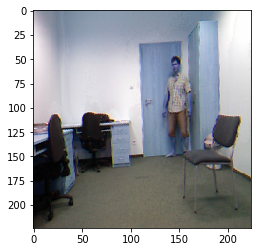

In [93]:
plt.imshow(cv2.resize(img_in, (W,H)))

In [94]:
WIN = int()
THRE = int()
random_name_list = list(range(1000000))
parent_folder = ''
scene_folder = glob.glob(parent_folder + '/*')
dest_folder = ''
if not os.path.isdir(dest_folder):
    os.mkdir(dest_folder)
nofall_path = os.path.join(dest_folder, 'nofall')
fall_path = os.path.join(dest_folder, 'fall')
if not os.path.isdir(nofall_path):
    os.mkdir(nofall_path)
if not os.path.isdir(fall_path):
    os.mkdir(fall_path)
camera_index = '' # enssentially we only need one folder
for scene in scene_folder:
    data_path = os.path.join(scene, camera_index)
    start, end, last = get_index(scene)
    for i in range(0, last, WIN):
        if i <= (end-THRE) and (i+WIN) >= (start+THRE):
            out_data = merger_image2arr(data_path, start_idx=i, end_idx=i+WIN)
            np.save(fall_path + '/' + str(random_name_list.pop()) + '.npy', out_data)
        elif (i+WIN) < start or i > end:
            out_data = merger_image2arr(scene, start_idx=i, end_idx=i+WIN)
            np.save(fall_path + '/' + str(random_name_list.pop()) + '.npy', out_data)
            
    
    

In [96]:
for i, vid in enumerate(onlyfiles):
    try:
        start, end, last = cuts[vid.split('.')[0]]
    except:
        continue
    # make name in file working
    tmp = list(vid)
    tmp.insert(5, '\\')
    tmp.insert(7, '\\')
    tmp.insert(-5, '\\')
    final_name = ''.join(tmp)
    for i in range(0, last, WIN):
        if (i+WIN) < last:
            if i <= (end-THRE) and (i+WIN) >= (start+THRE):
                os.system('ffmpeg -i ./'+ join(videopath, final_name) +' -ss '+str(float(i/FREQ))+' -t '+str(float(WIN/FREQ))+' '+fall_path+'/' + str(random_name_list.pop(0)) +'.avi')
            elif (i+WIN) < start or i > end:
                os.system('ffmpeg -i ./'+ join(videopath, final_name) +' -ss '+str(float(i/FREQ))+' -t '+str(float(WIN/FREQ))+' '+nofall_path+'/' +str(random_name_list.pop(0)) +'.avi')    
    